# **Exploring the Mexican Census 2020**

The National Institute of Statistics and Geography (INEGI) released the 2020 Population and Housing Census results, carried out from March 2 to 27, 2020. The purpose of the 2020 Census is to produce information on the volume, structure, and spatial distribution of the population and its primary demographic, socioeconomic, and cultural characteristics.

This tutorial will show how to access the INEGI data and show some of the most common data manipulation and data visualization tools in data science, such as Pandas, Matplotlib, Folium, and Plotly.



## Getting Census data
### First way: API calls
* a) **Request a Secret Key from INEGI**.
In order to make API calls, it is necessary to request a secret key from INEGI Navigate to the census developers page until finding the banner "El token puede obtenerse aquí” under the menu *Constructor de consultas* 

* b) You’ll be redirected to a page asking for an email address to register. Shortly, you will get an email with a long string of letters and numbers which is your API Key. Here the links [[1]](https://www.inegi.org.mx/servicios/api_indicadores.html)  [[2]](https://www.inegi.org.mx/app/api/indicadores/interna_v1_1/tokenVerify.aspx ) :


![Imagen](https://docs.google.com/uc?export=download&id=1dRKuYBEuloTEy5qrfUrcE0e8g_UKxtQS)  


* c)  Find the Right Data with the Indicators method. To consult the Indicators method, the parameters are sent directly in the URL, for example:

```python
Syntax: `https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/[IdIndicator]/[Idiom]/[Geographic area]/[Recent]/[Source]/[Version][Token]?type=[Format]`

URL: `https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/00/true/BISE/2.0/[HERE THE TOKEN]?type=json`

```



#### **Input parameters**


* **`Map`**

* **`IdIndicator`**
The first step to obtaining information from the API is selecting the indicator and identifying its key. This process can be done by consulting the "Query Builder."

* **`Idiom`**
The information is available in Spanish [es] and English [en].

* **`Geographic area`**
It can be national [00], by federal entity [99] or by municipality [999], depending on each indicator.

* **`Most recent data or historical series`**
Only the most recent data [true] or the complete historical series [false] can be consulted.
 
* **`Data source`**
It corresponds to the dissemination source [BISE] or [BIE] from which the consulted data will be obtained.

* **`Version`**
The edition [2.0] of the data provision service will be identified with it.

* **`Token`**
To use the API, it is necessary to send a valid token, which can be obtained in the link above. It seems that the token does not have a lifetime limit, and there were no findings of that.

* **`Format`**
The information is offered in 3 types of formats: JSON [json], JSONP [jsonp] or XML [xml].


#### **Output structure**
The results of an API request have the following general structure:

```python
 {"Header":{"Name":"Datos compactos BISE","Email":"atencion.usuarios@inegi.org.mx"},"Series":[{"INDICADOR":"1002000001","FREQ":"7","TOPIC":"123","UNIT":"96","NOTE":"1398","SOURCE":"2,3,343,487,510,1714,2960","LASTUPDATE":null,"STATUS":"3","OBSERVATIONS":[{"TIME_PERIOD":"2020","OBS_VALUE":"126014024.00000000000000000000","OBS_EXCEPTION":null,"OBS_STATUS":"3","OBS_SOURCE":"","OBS_NOTE":"","COBER_GEO":"0700"}]}]} 
``` 

* **`Go`**
Identifier of the selected method ["INDICATOR"].

* **`AgencyID`**
Identification of the agency that provides the data ["INEGI"].

* **`Version`**
Version of the method used to obtain the data [2.0].

* **`Lang`**
Key of the language in which the data is provided ["es"].

* **`CODE`**
It is the arrangement of the data obtained, each element consists of the following attributes: *Value*, it is an identifier of the data and *Description*, it is the description of the data.


### Second way: Download all Open Data files

Navigate to the census developers page until finding the option "El token puede obtenerse aquí” under the menu "Constructor de consultas".

* a) Navigate to the "Datos" page and you should see “Datos abiertos” and  **"Descargar todos los archivos"**.
* b) Unzip the contents of the .zip file in which you will find 3 files:
  * DescargaMasivaApp.exe
  * DescargaMasivaOD.xml
  * Leeme.txt
* c) Run the file DescargaMasivaApp.exe to automatically start downloading the files in the path you select. It is important that you stay connected to the Internet while the transfer is taking place. Here the links: Spanish   [[3]](https://www.inegi.org.mx/programas/ccpv/2020/#Datos_abiertos) and  English  [[4]](http://en.www.inegi.org.mx/programas/ccpv/2020/#Open_data)   

![Imagen](https://docs.google.com/uc?export=download&id=1EvWFG24ds53Pd3HOmgVOXfARTjr4HMHD)  




In [ ]:
#!pip freeze > request.txt

In [ ]:
!pip install "plotly==4.14.3"

     |████████████████████████████████| 13.2MB 285kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import requests
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
!pip install chart_studio
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
!pip3 install datapane
import datapane

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


     |████████████████████████████████| 71kB 3.1MB/s 
     |████████████████████████████████| 1.1MB 5.4MB/s 
     |████████████████████████████████| 102kB 6.9MB/s 
     |████████████████████████████████| 174kB 24.4MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 645kB 18.1MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
  Created wheel for stringcase: filename=stringcase-1.2.0-cp37-none-any.whl size=3577 sha256=76ce8d6236e3d19fce82fc961a9f5e542239bde2df1af9aa5b2512fae8a6f038
  Stored in directory: /root/.cache/pip/wheels/a0/16/a0/16e2c81dbd47503b5a35583dfabde5a93b4cf98dbf0033dad5
  Created wheel for micawber: filename=micawber-0.5.3-cp37-none-any.whl size=22157 sha256=db534adc9e69fbb117ef7d929958c62f616978628221634cf40fa0252700f9f2
  Stored in directory: /root/.cache/pip/wheels/e2/c5/fe/bc94a8efb4f8673765f2bedf479d9bde213ee9464f1c8c8e68
  Created wheel for face: filename=

In [ ]:
%cd /content/
!git clone https://github.com/aarondiuz/Proyecto_Censo.git
%cd Proyecto_Censo

/content
Cloning into 'Proyecto_Censo'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 80 (delta 23), reused 71 (delta 14), pack-reused 0
Unpacking objects: 100% (80/80), done.
/content/Proyecto_Censo


## Population growth in Mexico
This analysis will begin by showing the growth of the population in Mexico since 1910, for which the following URL will be used.

```python
URL: 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/00000/false/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'
``` 


In [ ]:
#### ESTE CODIGO ES PARA MOSTRARSE#########
# Calling API
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/00000/false/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'
response= requests.get(url)
if response.status_code==200:
    content= json.loads(response.content)
    Series=content['Series'][0]['OBSERVATIONS'] 
    
    # Obtaining observations list
    List_TotalPopulation = []
    List_Period = []
    for obs in Series: 
        List_TotalPopulation.append(float(obs['OBS_VALUE']))
        List_Period.append(int(obs['TIME_PERIOD']))
            
    # Generation of average of the observations list
    for i in range(0,len(List_TotalPopulation)):
        print(str(List_Period[i])+":",List_TotalPopulation[i])

1910: 15160369.0
1921: 14334780.0
1930: 16552722.0
1940: 19653552.0
1950: 25791017.0
1960: 34923129.0
1970: 48225238.0
1980: 66846833.0
1990: 81249645.0
1995: 91158290.0
2000: 97483412.0
2005: 103263388.0
2010: 112336538.0
2015: 119938473.0
2020: 126014024.0


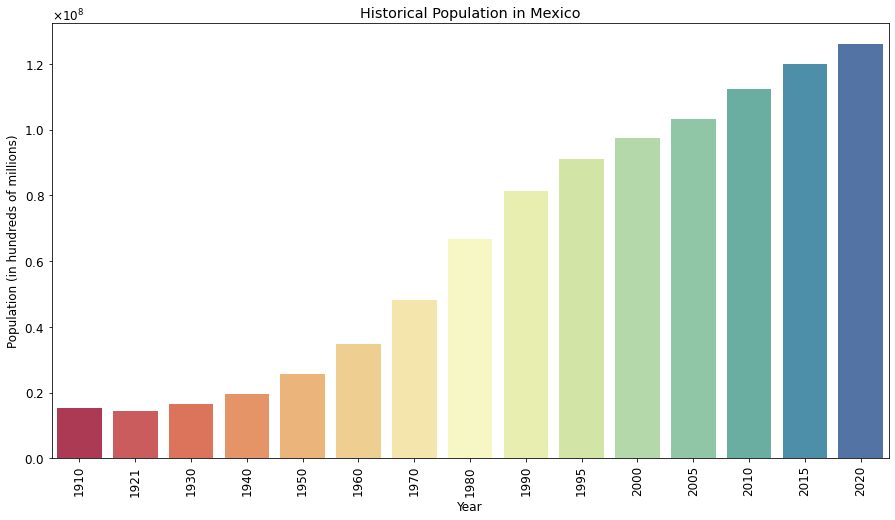

Connected successfully to https://datapane.com as aarondiuz


Bokeh version 2.1.1 is not supported, your plots may not display correctly, please install version ~=2.2.0
Folium version 0.8.3 is not supported, your plots may not display correctly, please install version >=0.12.0
/usr/local/lib/python3.7/dist-packages/datapane/client/api/report/core.py:273: UserWarning:

Passing visibility as a string is deprecated, use dp.Visibility enum instead.



Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/aarondiuz/reports/historicalpupulationmexico/


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

figure = plt.figure(figsize=(15,8))
font = {'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
sns.barplot(x=List_Period, y=List_TotalPopulation, palette="Spectral")
plt.xticks(rotation=90)
plt.title("Historical Population in Mexico")
plt.xlabel("Year")
plt.ylabel("Population (in hundreds of millions)")
plt.ticklabel_format(style='sci', axis='y', useMathText=True)
plt.show()

import datapane as dp

### Population growth by gender

Now, the population will be divided into men and women and show its growth.

Indicators
* Total male population: 1002000002
* Total female population: 1002000003

```python
URL: 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000002,1002000003/es/0700/false/BISE/2.0/d4536fae-59fd-94aa-e9a8-d743e7b47fcd?type=json'
``` 

As observed, between the decades of 1910 and 1950, the population grew constantly. From 1960, there is a high increase in the growth. Note that in 1960 and 1970, the percentage in the difference between men and women decreased.

In [ ]:
#### ESTE CODIGO ES PARA MOSTRARSE#########
#### Mostrar tambien la tabla del dataframe creado #########

import pandas as pd

# We can address more than one indicator using comma
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000002,1002000003/es/0700/false/BISE/2.0/d4536fae-59fd-94aa-e9a8-d743e7b47fcd?type=json'
response= requests.get(url)
if response.status_code==200:
    content= json.loads(response.content)
    
    # Obtaining Series
    Series_Men=content['Series'][0]['OBSERVATIONS']
    Series_Women=content['Series'][1]['OBSERVATIONS']
    
    # Obtaining populations lists
    List_MenPopulation = []
    List_WomenPopulation = []
    for obs in Series_Men: 
        List_MenPopulation.append(float(obs['OBS_VALUE']))
    for obs in Series_Women:
        List_WomenPopulation.append(float(obs['OBS_VALUE']))
    
    # The API database only goes up to 2010 for this indicator, so two extra values are added for each sex
    List_MenPopulation.append(58056133.0) #2015
    List_MenPopulation.append(61473390.0) #2020
    List_WomenPopulation.append(61474620.0) #2015
    List_WomenPopulation.append(64540634.0) #2020
        
# Creation of a DataFrame
populationDict = {'Year': List_Period, 'Both': List_TotalPopulation,'Men': List_MenPopulation,'Women': List_WomenPopulation}
PopulationDF = pd.DataFrame(populationDict)
PopulationDF.head()

,Year,Both,Men,Women
0,1910,15160369.0,7504471.0,7655898.0
1,1921,14334780.0,7003785.0,7330995.0
2,1930,16552722.0,8119004.0,8433718.0
3,1940,19653552.0,9695787.0,9957765.0
4,1950,25791017.0,12696935.0,13094082.0


In [ ]:
# Reorganizing
df = pd.melt(PopulationDF, id_vars="Year", var_name="Sex", value_name="Population")
df.head()

,Year,Sex,Population
0,1910,Both,15160369.0
1,1921,Both,14334780.0
2,1930,Both,16552722.0
3,1940,Both,19653552.0
4,1950,Both,25791017.0


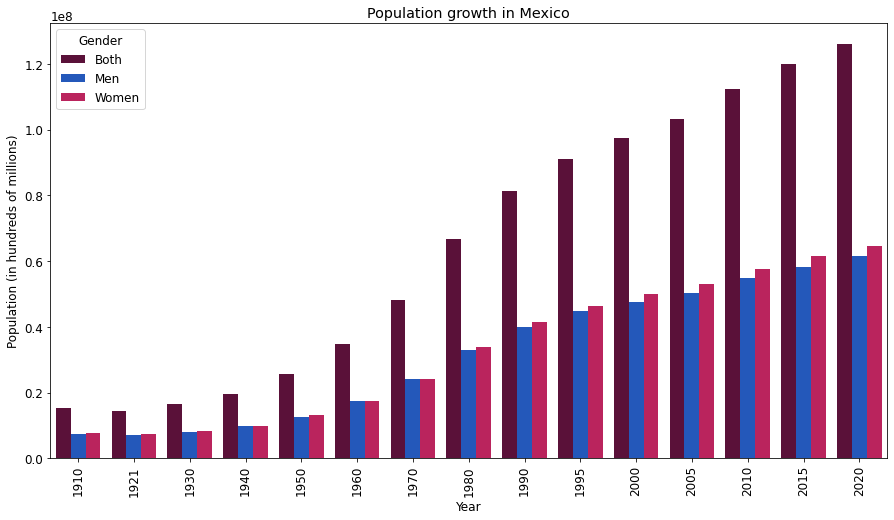

In [ ]:
figure = plt.figure(figsize=(15,8))
plt.title('Population growth in Mexico')
sns.barplot(x='Year', y='Population', data=df, hue='Sex', palette=["#66053A","#0B50D3","#D30B57"])
plt.gca().legend().set_title('Gender')
plt.xticks(rotation=90)
plt.ylabel("Population (in hundreds of millions)")
plt.show()

The percentage growth differences between men and women are shown graphically to get better visualization. A decrease is observed between the 1960s and 1970s, and the percentage increased from the 1980s, but, in general, there is a predominance in women in all cases.

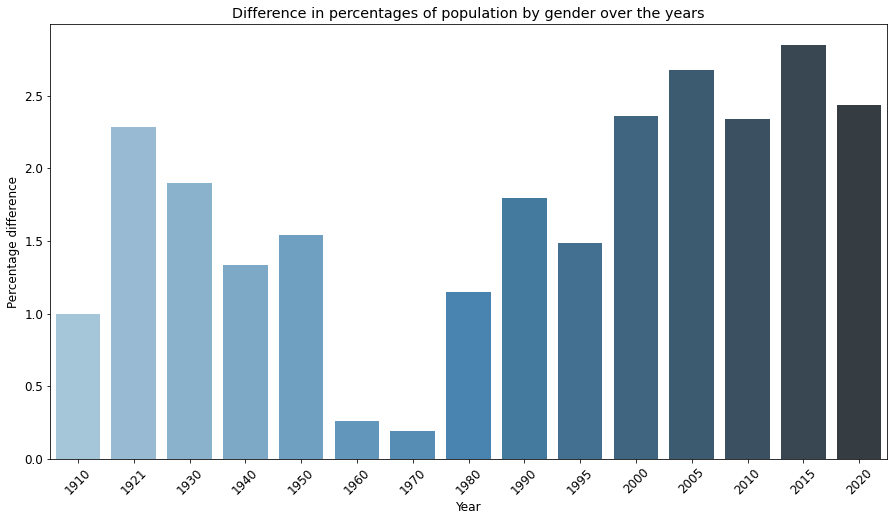

In [ ]:
# Positive values means predominance of women, negative values means predominance of men
PopulationDF['DiffP'] = 100*(PopulationDF['Women']-PopulationDF['Men'])/PopulationDF['Both']

figure = plt.figure(figsize=(15,8))
plt.title('Difference in percentages of population by gender over the years')
sns.barplot(x=PopulationDF['Year'], y=PopulationDF['DiffP'] ,palette="Blues_d")
plt.ylabel('Percentage difference')
plt.xticks(rotation=45)
plt.show()

## Percentage of population aged 12 years and older economically active by state

As an example of the manipulation of economic data for each of Mexico's states, the percentage of the population aged 12 years and older economically active will be displayed.

*Note: Mexico's states have an abbreviation that identifies them, organized in a specific order implemented by the National Population Registry (RENAPO).*


In [ ]:
# DataFrame of states with ID Number
# Se agregarn las abreviaturas de acuerdo con cierto instituto (para cita)
statesNames = pd.read_csv('data/Catalogo_entidades.csv')[:32]
statesNames

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,AGUASCALIENTES,AS
1,2,BAJA CALIFORNIA,BC
2,3,BAJA CALIFORNIA SUR,BS
3,4,CAMPECHE,CC
4,5,COAHUILA DE ZARAGOZA,CL
5,6,COLIMA,CM
6,7,CHIAPAS,CS
7,8,CHIHUAHUA,CH
8,9,CIUDAD DE MÉXICO,DF
9,10,DURANGO,DG


In [ ]:
#### ESTE CODIGO ES PARA MOSTRARSE#########
#### Mostrar tambien la tabla del dataframe creado #########

# We need to sweep over the '070000xx' in the URL API

ListPercent = []

for number in statesNames['CLAVE_ENTIDAD']:
    if number < 10:
        idnum = '0700000'+str(number)
    else:
        idnum = '070000'+str(number)
    url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207019030/es/'+idnum+'/true/BISE/2.0/d4536fae-59fd-94aa-e9a8-d743e7b47fcd?type=json'
    response = requests.get(url)
    if response.status_code == 200:
        content = json.loads(response.content)
        
        # Adding Series to ListPercent
        ListPercent.append(round(float(content['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE']),4))

# Lets add ListPercent to the DataFrame
statesNames['PERCENTAGE'] = ListPercent
statesNames.head()

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA,PERCENTAGE
0,1,AGUASCALIENTES,AS,63.3042
1,2,BAJA CALIFORNIA,BC,65.5097
2,3,BAJA CALIFORNIA SUR,BS,67.0458
3,4,CAMPECHE,CC,63.3418
4,5,COAHUILA DE ZARAGOZA,CL,59.9867


In [ ]:
# We need to import an XML file with geographic information of all states
geo_states = ('data/mexico_estados_geo.json')



In order to show how it is reflected geographically, we will use the _folium_ module. As observed, the country's central area is very homogeneous compared to the rest of the country.

In [ ]:
import folium
import branca.colormap as cm
from branca.element import Template, MacroElement

map_dict = statesNames.set_index('ABREVIATURA')['PERCENTAGE'].to_dict()

def get_color(feature):
    value = map_dict.get(feature['id'])
    if value is None:
        return '#8c8c8c' # MISSING -> gray
    elif value <= 57.0:
        return '#1C0101'
    elif value < 59.0 :
        return '#581845'
    elif value < 61.0 :
        return '#900C3F'
    elif value < 63.0 :
        return '#C70039'
    elif value < 65.0 :# Check here i too had same problem
        return '#FF5733'
    elif value < 67.0 :
        return '#FFC300'
    elif value < 69.0 :# Check here i too had same problem
        return '#DAF7A6'

# Subsequently, the necessary information is added to modify the map according to the data in the dataframe
map = folium.Map (location=[24,-102], zoom_start=5)

folium.GeoJson(
    data= geo_states,
    style_function = lambda feature: {
                  'fillColor': get_color(feature),
                  'fillOpacity': 0.9,
                  'color' : 'black',
                  'weight' : 1,
                 }
).add_to(map)

template = """{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Percentage of population</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#1C0101;'></span>55% to 57% </li>
    <li><span style='background:#581845;'></span>57% to 59%</li>
    <li><span style='background:#900C3F;'></span>59% to 61%</li>
    <li><span style='background:#C70039;'></span>61% to 63%</li>
    <li><span style='background:#FF5733;'></span>63% to 65%</li>
    <li><span style='background:#FFC300;'></span>65% to 67% </li>
    <li><span style='background:#DAF7A6;'></span>67% to 69% </li>



  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map.get_root().add_child(macro)

# Displaying the map
map

## The average schooling level of the population 15 years of age and older


The average schooling level for the population over 15 years old will be analyzed, historically and in the last census. However, 2020 data for this item is not available in the API, so the data requested corresponds to the data from 2000 to 2015; the data for 2020 data will be taken from the CSV provided in the following link:
[[5]](https://www.inegi.org.mx/programas/ccpv/2020/#Datos_abiertos)  

Education in Mexico is divided into four main stages: elementary (6 years long), mid-school (3 years long), high school (3 years long) and college (3 to 5 years long).



In [ ]:
#### ESTE CODIGO ES PARA MOSTRARSE#########

# Lets get the data from 2000 to 2015
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1005000038/es/0700/false/BISE/2.0/d4536fae-59fd-94aa-e9a8-d743e7b47fcd?type=json'
response= requests.get(url)
if response.status_code==200:
    content= json.loads(response.content)
    
    Serie = content['Series'][0]['OBSERVATIONS']
    
    List_Periods=[]
    List_AvgGrade=[]
    for observation in Serie:
        if observation['TIME_PERIOD'] == '1995': # Since the OBS_VALUE is None
            pass
        else:
            List_Periods.append(int(observation['TIME_PERIOD']))
            List_AvgGrade.append(round(float(observation['OBS_VALUE']),2))
            
    print(List_Periods,'\n\n',List_AvgGrade)

[2000, 2005, 2010, 2015] 

 [7.5, 8.1, 8.63, 9.16]


In [ ]:
#### ESTE CODIGO ES PARA MOSTRARSE#########

# Data for 2020
!unzip 'data/conjunto_de_datos_iter_00_cpv2020.zip'
!mv conjunto_de_datos_iter_00_cpv2020.csv data/conjunto_de_datos_iter_00_cpv2020.csv
# Now we should call the CSV to get the 2020 data
data_2020 = pd.read_csv('data/conjunto_de_datos_iter_00_cpv2020.csv', low_memory=False)
data_2020.head()

Archive:  data/conjunto_de_datos_iter_00_cpv2020.zip
  inflating: conjunto_de_datos_iter_00_cpv2020.csv  


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,...,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,...,23887498,2085925,5460133,27527131,34805976,268863,33858339,29541708,1215497,22629812,9652823,33081729,1396774,33564054,1498766,32671764,79584,32979844,16874580,581095,30811260,25610544,16651199,16340788,4227460,7469168,23772973,32031555,13204680,13184550,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,96869,153485,10493,5193,5300,239441,91463,147978,232086,87931,144155,207748,76111,131637,197411,71344,126067,186968,66514,120454,10900,5270,5630,20793,10082,10711,24342,11538,12804,10337,...,31851,7333,16206,38424,48426,13538,45470,8198,16498,34143,13743,44688,9825,47253,14708,35091,4842,43668,24373,5136,38199,26412,13608,30940,15001,13600,36738,40001,5797,3523,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,61324,85801,6798,3407,3391,139757,57628,82129,135028,55256,79772,119223,47543,71680,111530,44275,67255,104612,41184,63428,7028,3511,3517,13506,6574,6932,16724,7679,9045,7693,...,19157,4351,9491,22351,28586,7607,26499,5054,9696,18089,7029,24348,6050,26036,10155,19807,2935,23841,16122,4115,21775,15880,7902,16699,8076,6330,20009,23198,3588,2177,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,1510,2187,165,81,84,3532,1429,2103,3420,1377,2043,3018,1179,1839,2836,1086,1750,2609,987,1622,169,80,89,345,170,175,427,211,216,182,...,531,39,116,646,723,78,694,195,107,608,405,708,27,719,82,610,16,704,203,12,632,561,276,529,216,407,650,684,167,43,732,205,212,48,41,39,62,530,20,*


From the provided dictionary in the link from above, we can search for the Mnemotecnic of the indicator. In this case, we will be using _GRAPROES_, that stands for "Grado Promedio Escolar" or average school grade.



In [ ]:
#### Mostrar solo la tabla #########

# We select some columns that will be useful for later on.
graproes_2020 = data_2020[['ENTIDAD','NOM_ENT','NOM_LOC','GRAPROES']]
graproes_2020.head()

,ENTIDAD,NOM_ENT,NOM_LOC,GRAPROES
0,0,Total nacional,Total nacional,9.74
1,0,Total nacional,Localidades de una vivienda,6.5
2,0,Total nacional,Localidades de dos viviendas,6.45
3,1,Aguascalientes,Total de la Entidad,10.35
4,1,Aguascalientes,Localidades de una vivienda,8.14


In [ ]:
# Now, we can extract the national average grade of schooling from 2020
List_Periods.append(2020)
List_AvgGrade.append(float(graproes_2020['GRAPROES'][0]))

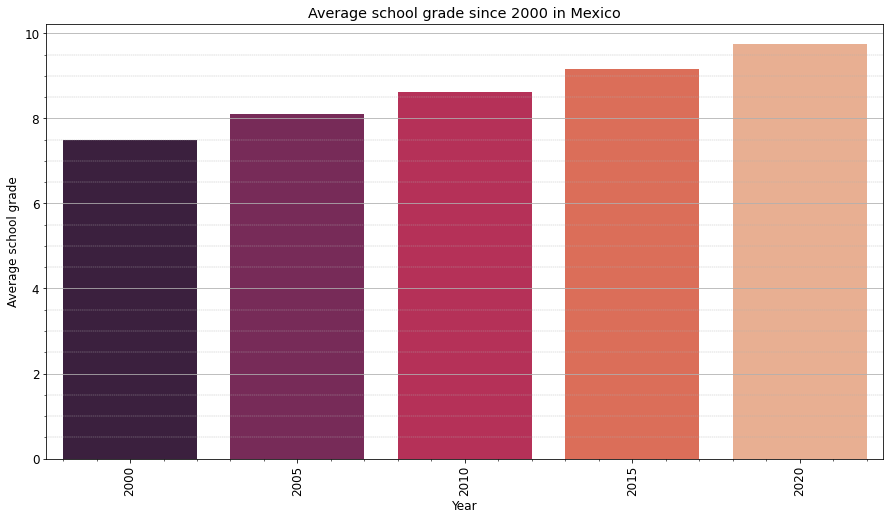

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/aarondiuz/reports/average-school-grade-mexico/


In [ ]:
figure = plt.figure(figsize=(15,8))
plt.title('Average school grade since 2000 in Mexico')
sns.barplot(x=List_Periods, y=List_AvgGrade, palette="rocket", orient='v')
plt.xticks(rotation=90)
plt.minorticks_on()
plt.grid(which='major', axis='y')
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.4)
plt.xlabel("Year")
plt.ylabel("Average school grade")
plt.show()

As can be seen, an average value just above nine years means that the majority of Mexicans have completed middle school.

It is possible to predict with a simple linear extrapolation what will be the average school grade in 2025 and 2030.


In [ ]:
from sklearn.linear_model import LinearRegression

Extra_List_Periods = List_Periods.copy()
for i in [2025, 2030]:
  Extra_List_Periods.append(i)

x_s = np.array(List_Periods).reshape(-1,1)
x_L = np.array(Extra_List_Periods).reshape(-1,1)
y = np.array(List_AvgGrade)

model = LinearRegression().fit(x_s, y)

fig = go.Figure()
fig.add_trace(go.Bar(x=List_Periods, y=List_AvgGrade, name='Original Data'))
fig.add_trace(go.Bar(x=Extra_List_Periods[-2:], y=model.predict(x_L)[-2:], marker_color='crimson', name='Prediction'))
fig.add_trace(go.Scatter(x=Extra_List_Periods, y=model.predict(x_L), marker_color='black',
                         name='Extrapolation'))
fig.update_layout(title="Linear prediction of the average school grade for 2025 and 2030",
                  xaxis_title="Year", yaxis_title="Average school grade",
                  yaxis=dict(nticks=12), width=1400)
fig.update_traces(line=dict(dash='dot'), selector=dict(type='scatter'))
fig.update_traces(texttemplate='%{text:.3s}', textposition='top outside', selector=dict(type='Bar'))
fig.add_annotation(x=2000, y=9.5, 
                   text=r"$R^2={}$".format(model.score(x_s,y).round(4)),
                   showarrow = False)
fig.add_annotation(x=2001, y=10.5, 
                   text=r"$y={}x {}$".format(model.coef_[0].round(4), model.intercept_.round(4)),
                   showarrow = False)
fig.update(layout=dict(title=dict(x=0.5)))
fig.show(renderer="colab")

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/aarondiuz/reports/average-school-grade-mexico-prediction-/



According to the linear prediction, by 2025, most Mexicans over 15 are expected to have completed at least the first year of high school.

### The average level of schooling of the population 15 years of age and older (By state)

It is of great interest to know the distribution of school grade averages in the country's states, for which reason a map with the levels of each state is presented below.

In [ ]:
#### Mostrar la tabla y el mapa #########

# We will be using the CSV file to get the data from each state
graproesState_2020 = graproes_2020[graproes_2020['NOM_LOC']=='Total de la Entidad']
graproesState_2020.reset_index(drop=True, inplace=True)
graproesState_2020.head()

,ENTIDAD,NOM_ENT,NOM_LOC,GRAPROES
0,1,Aguascalientes,Total de la Entidad,10.35
1,2,Baja California,Total de la Entidad,10.2
2,3,Baja California Sur,Total de la Entidad,10.34
3,4,Campeche,Total de la Entidad,9.63
4,5,Coahuila de Zaragoza,Total de la Entidad,10.43


In [ ]:
# Now we just need to merge de abreviations from the DataFrame from before and repeat the same process used for the first map
graproesState_2020['ABREVIATION'] = statesNames['ABREVIATURA'].astype(str)
graproesState_2020['GRAPROES'] = graproesState_2020['GRAPROES'].astype(float)

map_dict = graproesState_2020.set_index('ABREVIATION')['GRAPROES'].to_dict()
map_graproes = folium.Map(location = [24,-102], zoom_start=5)

def get_color(feature):
    value = map_dict.get(feature['id'])
    if value is None:
        return '#8c8c8c' # MISSING -> gray
    elif value <= 8.0:
        return '#1C0101'
    elif value < 8.5 :
        return '#581845'
    elif value < 9.0 :
        return '#900C3F'
    elif value < 9.5 :
        return '#C70039'
    elif value < 10.0 :# Check here i too had same problem
        return '#FF5733'
    elif value < 10.5 :
        return '#FFC300'
    elif value < 12.0 :# Check here i too had same problem
        return '#DAF7A6'

folium.GeoJson(
    data= geo_states,
    style_function = lambda feature: {
                  'fillColor': get_color(feature),
                  'fillOpacity': 0.9,
                  'color' : 'black',
                  'weight' : 1,
                 }
).add_to(map_graproes)

'''# Subsequently, the necessary information is added to modify the map according to the data in the dataframe.
folium.Choropleth(geo_data = geo_states, data = graproesState_2020,
                 columns = ['ABREVIATION', 'GRAPROES'], key_on = 'feature.id',
                 fill_color ='YlGnBu',
                 fill_opacity=0.7,
                 legend_name='Average').add_to(map_grapoes)'''

template = """{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Scholar Average Year</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#1C0101;'></span> < 8.0 </li>
    <li><span style='background:#581845;'></span> 8.0 - 8.5</li>
    <li><span style='background:#900C3F;'></span> 8.5 - 9.0</li>
    <li><span style='background:#C70039;'></span> 9.0 - 9.5</li>
    <li><span style='background:#FF5733;'></span> 9.5 - 10.0</li>
    <li><span style='background:#FFC300;'></span> 10.0 - 10.5 </li>
    <li><span style='background:#DAF7A6;'></span> > 10.5</li>



  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map_graproes.get_root().add_child(macro)

# Displaying the map
map_graproes



It would be interesting to observe the increase in the average school year for all the states to know if the educational programs implemented have influenced the current position in which they find themselves.

In [ ]:
graproesState_2020.dtypes

ENTIDAD          int64
NOM_ENT         object
NOM_LOC         object
GRAPROES       float64
ABREVIATION     object
dtype: object

In [ ]:
# We reorder the DataFrame
graproesState_top = graproesState_2020.sort_values('GRAPROES', ascending=False)
graproesState_top = graproesState_top.rename(columns={"GRAPROES":"2020"})
graproesState_top.head()

,ENTIDAD,NOM_ENT,NOM_LOC,2020,ABREVIATION
8,9,Ciudad de México,Total de la Entidad,11.48,DF
18,19,Nuevo León,Total de la Entidad,10.74,NL
21,22,Querétaro,Total de la Entidad,10.48,QT
4,5,Coahuila de Zaragoza,Total de la Entidad,10.43,CL
25,26,Sonora,Total de la Entidad,10.40,SR


We will take the historical data from the API.

In [ ]:
# Add two columns to the top 5 DF with zeroes
graproesState_top['2010'] = 0.0
graproesState_top['2015'] = 0.0
graproesState_top.head()

,ENTIDAD,NOM_ENT,NOM_LOC,2020,ABREVIATION,2010,2015
8,9,Ciudad de México,Total de la Entidad,11.48,DF,0.0,0.0
18,19,Nuevo León,Total de la Entidad,10.74,NL,0.0,0.0
21,22,Querétaro,Total de la Entidad,10.48,QT,0.0,0.0
4,5,Coahuila de Zaragoza,Total de la Entidad,10.43,CL,0.0,0.0
25,26,Sonora,Total de la Entidad,10.40,SR,0.0,0.0


It would be ideal for making a single request to the API, in which the values for the 32 states are received. However, there is a limit to the number of IDs that can be included in a request, which is 30. Therefore, this time individual requests will be made for each state, which facilitates integrating the data into the DataFrame.

In [49]:
#### ESTE CODIGO ES PARA MOSTRARSE#########
### Tambien la tabla y la grafica de barras

# Lets get the data from 2010 and 2015 for all the states
for i in range(1,33):
  if i < 10:
    id_number =  '0700000{}'.format(i)
  else:
    id_number =  '070000{}'.format(i)
  url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1005000038/es/{}/false/BISE/2.0/d4536fae-59fd-94aa-e9a8-d743e7b47fcd?type=json'.format(id_number)
  response= requests.get(url)
  if response.status_code==200:
      content= json.loads(response.content)
      
      Serie = content['Series'][0]['OBSERVATIONS']
      for observation in Serie:
        if observation['TIME_PERIOD'][2] != '1':
          pass
        else:
          if observation['COBER_GEO'][-2] == '0':
            entidad = int(observation['COBER_GEO'][-1])
          else:
            entidad = int(observation['COBER_GEO'][-2:])
          if observation['TIME_PERIOD'] == '2010':
            graproesState_top['2010'][entidad-1] = round(float(observation['OBS_VALUE']),2)
          elif observation['TIME_PERIOD'] == '2015':
            graproesState_top['2015'][entidad-1] = round(float(observation['OBS_VALUE']),2)

graproesState_top.head()

,ENTIDAD,NOM_ENT,NOM_LOC,2020,ABREVIATION,2010,2015,INCREMENT
8,9,Ciudad de México,Total de la Entidad,11.48,DF,10.54,11.12,0.94
18,19,Nuevo León,Total de la Entidad,10.74,NL,9.81,10.27,0.93
21,22,Querétaro,Total de la Entidad,10.48,QT,8.92,9.55,1.56
4,5,Coahuila,Total de la Entidad,10.43,CL,9.47,9.90,0.96
25,26,Sonora,Total de la Entidad,10.40,SR,9.42,10.00,0.98


*_Plotly_* will now display five bar plots that show the five states with de highest grade school averages, comparing the increase between 2010 and 2020.

In [ ]:
# Reorganize the data
graproesState_top5_melted = graproesState_top[:5].melt(id_vars=["NOM_ENT"], value_vars=['2010','2015','2020'], var_name='YEAR', value_name='GRAPROES')
graproesState_top5_melted.head()

,NOM_ENT,YEAR,GRAPROES
0,Ciudad de México,2010,10.54
1,Nuevo León,2010,9.81
2,Querétaro,2010,8.92
3,Coahuila de Zaragoza,2010,9.47
4,Sonora,2010,9.42


In [48]:
fig = px.bar(graproesState_top5_melted, x="NOM_ENT", y="GRAPROES", color="YEAR", barmode="group", range_y=[8.5,12], labels={'GRAPROES':'Average School Grade', 'NOM_ENT':'State'},
             title="Top 5 Mexican States with the highest average school grade and their evolution from 2010 to 2020")
fig.update_traces(texttemplate='%{text:.3s}', textposition='top outside', selector=dict(type='Bar'))
fig.update(layout=dict(title=dict(x=0.5)))
fig.show(renderer="colab")

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/aarondiuz/reports/top-5-graproesstate/


As can be seen in the graph Querétaro had the largest increase.

A new column is created to show the increment in the average number of school years comparing 2010 and 2020.

In [51]:
#### MOstrar la tabla y el mapa #########

graproesState_top['INCREMENT'] = graproesState_top['2020'] - graproesState_top['2010']
graproesState_top.head()

,ENTIDAD,NOM_ENT,NOM_LOC,2020,ABREVIATION,2010,2015,INCREMENT
8,9,Ciudad de México,Total de la Entidad,11.48,DF,10.54,11.12,0.94
18,19,Nuevo León,Total de la Entidad,10.74,NL,9.81,10.27,0.93
21,22,Querétaro,Total de la Entidad,10.48,QT,8.92,9.55,1.56
4,5,Coahuila,Total de la Entidad,10.43,CL,9.47,9.90,0.96
25,26,Sonora,Total de la Entidad,10.40,SR,9.42,10.00,0.98


In [61]:
# We must modify the names of some states to match the geolocation file of the country.
graproesState_top['NOM_ENT'][4] = "Coahuila"
graproesState_top['NOM_ENT'][29] = "Veracruz"
graproesState_top['NOM_ENT'][15] = "Michoacán"

# In this map, we will be using a different geojson file
url='https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
response= requests.get(url)
if response.status_code==200:
    content_geo = json.loads(response.content)

fig = px.choropleth_mapbox(graproesState_top,
                           geojson=content_geo,
                           featureidkey="properties.name",
                           locations='NOM_ENT',
                           color='INCREMENT',
                           color_continuous_scale="Bluyl",
                           opacity = 0.5,
                           center={"lat": 24, "lon": -102},
                           mapbox_style="open-street-map",
                           zoom=3.5)
fig.update_layout(
    title_text = 'Increase in the average school year in the states of Mexico - 2010 vs. 2020',
    #hovermode='closest',
    font=dict(
        family="Ubuntu",
        size=16,
        #color="#7f7f7f"
        color="Black"
    ),
    margin={"r":100,"t":50,"l":100,"b":0},
    annotations = [dict(
        x=0.55,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Fuente: <a href="https://www.inegi.org.mx/programas/ccpv/2020/" style="left">\
            INEGI </a>',
        showarrow = False
    )]
)
fig.update(layout=dict(title=dict(x=0.5)))
fig.show(renderer="colab")

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/aarondiuz/reports/map-2010-2020-graproesstate-1/


## Population affiliated to health services

The API Service only gives the population affiliated to health services; instead, the CSV file with 2020 data gives the population that has and does not have health services.

In [ ]:
####  Mostrar solo la grafica de pastel y el mapa #########

# The two indicators that we need are PDER_SS and PSINDER
# From the original DF:
SS = data_2020[['PDER_SS','PSINDER']].iloc[0].astype(float)
SS

PDER_SS    92582812.0
PSINDER    32999713.0
Name: 0, dtype: float64

In [ ]:
# Lests check if the sum of both values gives the total population
print(SS['PDER_SS']+SS['PSINDER'])
print(List_TotalPopulation[-1])

125582525.0
126014024.0


In [ ]:
# The quantity differs form the total population, that means that the rest of persons didn't specify if they have SS.
SS['DSPECIFY'] = List_TotalPopulation[-1] - (SS['PDER_SS']+SS['PSINDER'])
SS

PDER_SS     92582812.0
PSINDER     32999713.0
DSPECIFY      431499.0
Name: 0, dtype: float64

In [62]:
# We proceed to make a pie chart

fig = px.pie(SS, values=SS.values, names=['With Health Services', 'Without Health Services', "Didn't specify"],
             title='Percentage of population with Health Services (of any kind)',
             labels={'label':'SS', 'value':'Population'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=800, legend=dict(title="Population:",borderwidth=1.5, x=0, y=0))
fig.update(layout=dict(title=dict(x=0.5)))
fig.show(renderer="colab")

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/aarondiuz/reports/health-services/


There are four geographic levels from which information can be obtained: national, state, municipal, and locality. Below is a map showing the percentage of population per municipality with social security in Yucatan.

The data will be obtained from the CSV file of the 2020 census.


In [ ]:
SS_der_DF = data_2020[['NOM_MUN','POBTOT','PSINDER','PDER_SS','PDER_IMSS','PDER_ISTE','PDER_ISTEE','PAFIL_PDOM','PDER_SEGP','PDER_IMSSB','PAFIL_IPRIV','PAFIL_OTRAI']][(data_2020['ENTIDAD'] == 31) & (data_2020['MUN'] != 0) & (data_2020['LOC'] == 0)]
SS_der_DF = SS_der_DF.reset_index(drop=True)

for name in SS_der_DF.columns[1:]:
  SS_der_DF[name] = SS_der_DF[name].astype(int)

SS_der_DF['PERCENTAGE_PDER_SS'] = round((SS_der_DF['PDER_SS']/SS_der_DF['POBTOT'])*100,2)
SS_der_DF

,NOM_MUN,POBTOT,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,PERCENTAGE_PDER_SS
0,Abalá,6550,1193,5356,2403,98,2,7,2796,33,22,8,81.77
1,Acanceh,16772,3208,13559,10087,170,18,35,2507,796,42,28,80.84
2,Akil,12285,2585,9697,1115,669,1,3,7754,216,10,14,78.93
3,Baca,6195,1195,4999,3989,138,21,11,817,24,45,20,80.69
4,Bokobá,2167,157,2010,782,30,0,14,1070,17,70,33,92.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Valladolid,85460,23555,61822,17505,6386,110,1383,35959,211,669,274,72.34
102,Xocchel,3451,1082,2369,1104,41,3,2,1090,147,3,0,68.65
103,Yaxcabá,16350,2451,13899,942,218,13,14,12656,104,8,8,85.01
104,Yaxkukul,3293,686,2582,1476,70,32,6,971,19,51,6,78.41


In [64]:
# In this map, we will be using a geojson file with the municipalities of Yucatan, provided by Rolando Tamayo
url='https://raw.githubusercontent.com/aarondiuz/Proyecto_Censo/main/data/geojson_municipios/Munxentidad31.json'
response= requests.get(url)
if response.status_code==200:
    content_geo = json.loads(response.content)

fig = px.choropleth_mapbox(SS_der_DF,
                           geojson=content_geo,
                           featureidkey="properties.mun_name",
                           locations='NOM_MUN',
                           color="PERCENTAGE_PDER_SS",
                           labels = {"NOM_MUN":"Municipality", "PERCENTAGE_PDER_SS":"Percentage with SS"},
                           color_continuous_scale="Bluyl",
                           opacity = 0.5,
                           center={"lat": 20.5, "lon": -89},
                           mapbox_style="open-street-map",
                           title = "Population affiliated to Health Services in Yucatan by municipality",
                           zoom=7)
fig.update_layout(
    font=dict(
        family="Ubuntu",
        size=16,
        #color="#7f7f7f"
        color="Black"
    ),
    margin={"r":50,"t":50,"l":50,"b":0},
    annotations = [dict(
        x=0.55,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Fuente: <a href="https://www.inegi.org.mx/programas/ccpv/2020/" style="left">\
            INEGI </a>',
        showarrow = False
    )]
)
fig.update(layout=dict(title=dict(x=0.5)))
fig.show(renderer="colab")

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/aarondiuz/reports/yucatan-map-health-services1/


# Conclusion
We hope that this abbreviated tutorial on data from the Mexico Census will help people interested in knowing important information about this country. To see the full tutorial, visit:  https://github.com/aarondiuz/Proyecto_Censo


Also, in this data project, we can draw two important lessons:
* Data manipulation is important

Most of the time, it will be necessary to clean the data, filter it, and even mix it with another database to understand the information better.

* The power of visualizations

Once the data is available, it is necessary to know how to choose the way in which the information we want to transmit will be best reflected. As shown here, there are different ways, as well as the different available libraries. A great display can captivate the audience and ensure the right message gets delivered.




# References

[1] https://www.inegi.org.mx/servicios/api_indicadores.html 

[2] https://www.inegi.org.mx/app/api/indicadores/interna_v1_1/tokenVerify.aspx 

[3] https://www.inegi.org.mx/programas/ccpv/2020/#Datos_abiertos

[4] http://en.www.inegi.org.mx/programas/ccpv/2020/#Open_data 

[5] https://www.inegi.org.mx/programas/ccpv/2020/#Datos_abiertos  




https://es.stackoverflow.com/users/61530/rolando-tamayo